In [1]:
import os
import statistics
import scipy as sp
import math
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline

In [2]:
# Read data from CSV files
data_2019_2020 = pd.read_csv('/content/transfermarkt_fbref_201920.csv', sep=';', engine='python')
data_2017_2018 = pd.read_csv('/content/transfermarkt_fbref_201718.csv', sep=';', engine='python')
data_2018_2019 = pd.read_csv('/content/transfermarkt_fbref_201819.csv', sep=';', engine='python')


# Concatenate the dataframes
merged_data = pd.concat([data_2019_2020, data_2018_2019, data_2017_2018], ignore_index=True)

# Sort the dataframe by 'player' column
merged_data.sort_values('player', inplace=True)

In [3]:
merged_data.dropna(subset=['player'], inplace=True)

In [4]:
player_corrected = [i for i in merged_data['player']]

In [5]:
for indice_j,nom_j in enumerate(player_corrected) :
    tab_c = list(nom_j)
    l = len(tab_c)
    for indice_c,caractere in enumerate(tab_c) :
        if caractere == 'Ă' :
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '\x81' :
                    tab_c[indice_c] = 'A'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '\xad' :
                    tab_c[indice_c] = 'i'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '\x98' :
                    tab_c[indice_c] = 'O'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '©' :
                    tab_c[indice_c] = 'e'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'ˇ' :
                    tab_c[indice_c + 1] = 'a'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '‰' :
                    tab_c[indice_c] = 'E'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'ł' :
                    tab_c[indice_c] = 'o'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '«' :
                    tab_c[indice_c] = 'e'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'Ż' :
                    tab_c[indice_c] = 'i'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '‡' :
                    tab_c[indice_c] = 'c'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '–' :
                    tab_c[indice_c] = 'O'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '“' :
                    tab_c[indice_c] = 'O'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '±' :
                    tab_c[indice_c] = 'n'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '' :
                    tab_c[indice_c] = 'A'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'Ľ' :
                    tab_c[indice_c] = 'u'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '¶' :
                    tab_c[indice_c] = 'o'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '¸' :
                    tab_c[indice_c] = 'o'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'Ş' :
                    tab_c[indice_c] = 'e'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '§' :
                    tab_c[indice_c] = 'c'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'ş' :
                    tab_c[indice_c] = 'u'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '¤' :
                    tab_c[indice_c] = 'a'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '°' :
                    tab_c[indice_c] = 'o'
                    del tab_c[indice_c + 1]
                    break
                else :
                    tab_c[indice_c] = 'a'
                    break
        if caractere == 'Ł':
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'o' :
                    tab_c[indice_c] = 'o'
                    del tab_c[indice_c + 1]
                    break
        if caractere == 'Ĺ' :
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'ź' :
                    tab_c[indice_c] = 's'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '\x81' :
                    tab_c[indice_c] = 'L'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '\xa0' :
                    tab_c[indice_c] = 'S'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'ˇ' :
                    tab_c[indice_c] = 's'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'ľ' :
                    tab_c[indice_c] = 'z'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '»' :
                    tab_c[indice_c] = 'Z'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '„' :
                    tab_c[indice_c] = 'n'
                    del tab_c[indice_c + 1]
                    break
        if caractere == 'Ä' :
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '›' :
                    tab_c[indice_c] = 'e'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'Ť' :
                    tab_c[indice_c] = 'c'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '…' :
                    tab_c[indice_c] = 'a'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '™' :
                    tab_c[indice_c] = 'e'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '‡' :
                    tab_c[indice_c] = 'c'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '\x83' :
                    tab_c[indice_c] = 'a'
                    del tab_c[indice_c + 1]
                    break
        if caractere == 'Č' :
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '›' :
                    tab_c[indice_c] = 't'
                    del tab_c[indice_c + 1]
                    break
    player_corrected[indice_j] = "".join(tab_c)

In [6]:
merged_data = merged_data.drop(['player'], axis=1)
merged_data.insert(0, 'player', player_corrected)


In [7]:
merged_data.drop(columns=['Column1','Unnamed: 0', 'Attendance','birth_year', 'MP'], inplace=True)

merged_data.head()

,player,nationality,position,squad,age,value,height,position2,foot,league,...,Pts,Pts/G,xG,xGA,xGDiff,xGDiff/90,CL,WinCL,CLBestScorer,Season
466,Aaron Connolly,ie IRL,FW,Brighton,19.0,4000000.0,175.0,Forward - Centre-Forward,right,Premier League,...,41.0,1.08,41.2,54.5,-13.3,-0.35,0.0,0.0,0.0,201920#
4548,Aaron Cresswell,eng ENG,DF,West Ham,28.0,10000000.0,170.0,Defender - Left-Back,left,Premier League,...,52.0,1.37,49.1,61.0,-11.9,-0.31,0.0,0.0,0.0,201819#
6923,Aaron Cresswell,eng ENG,DF,West Ham,27.0,12000000.0,170.0,Defender - Left-Back,left,Premier League,...,42.0,1.11,37.3,57.8,-20.5,-0.54,0.0,0.0,0.0,201718#
5545,Aaron Hunt,de GER,"MF,FW",Hamburger SV,30.0,1500000.0,183.0,midfield - Attacking Midfield,left,Bundesliga,...,31.0,0.91,37.1,52.7,-15.7,-0.46,0.0,0.0,0.0,201718#
493,Aaron Lennon,eng ENG,MF,Burnley,32.0,2000000.0,165.0,Forward - Right Winger,right,Premier League,...,54.0,1.42,43.9,48.3,-4.4,-0.12,0.0,0.0,0.0,201920#


In [8]:
#adding dummy variables to dataset
merged_data = pd.get_dummies(merged_data, columns=['league'])
merged_data = merged_data.rename({"league_Bundesliga":"isBundesliga",
                                "league_La Liga":"isLaLiga",
                                "league_Premier League":"isPremierLeague",
                                "league_Ligue 1":"isLigue1",
                                "league_Serie A":"isSerieA"},axis='columns')
merged_data = pd.get_dummies(merged_data,columns=['Season'])
merged_data = pd.get_dummies(merged_data,columns=['foot'])
#deleting potential outliers that actually contribute nothing
merged_data = merged_data[merged_data['value']>1000000]
merged_data = merged_data[merged_data['games']>5]
merged_data = merged_data[merged_data['age']>0]
merged_data = merged_data[merged_data['height']>0]

In [9]:
#FORWARDS
data_forwards1  = merged_data[merged_data['position2'].str[:7]=='Forward']
data_forwards2 = merged_data[merged_data['position2'].str[:6]=='attack']
data_forwards  = pd.concat([data_forwards1,data_forwards2], ignore_index=True)
data_forwards.head()

,player,nationality,position,squad,age,value,height,position2,games,games_starts,...,isLaLiga,isLigue1,isPremierLeague,isSerieA,Season_201718#,Season_201819#,Season_201920#,foot_both,foot_left,foot_right
0,Aaron Connolly,ie IRL,FW,Brighton,19.0,4000000.0,175.0,Forward - Centre-Forward,24.0,14.0,...,False,False,True,False,False,False,True,False,False,True
1,Aaron Lennon,eng ENG,MF,Burnley,32.0,2000000.0,165.0,Forward - Right Winger,16.0,4.0,...,False,False,True,False,False,False,True,False,False,True
2,Aaron Lennon,eng ENG,"FW,MF",Burnley,31.0,5000000.0,165.0,Forward - Right Winger,16.0,14.0,...,False,False,True,False,False,True,False,False,False,True
3,Aaron Leya Iseka,be BEL,FW,Toulouse,20.0,3000000.0,182.0,Forward - Centre-Forward,28.0,15.0,...,False,True,False,False,False,True,False,False,False,True
4,Aaron Leya Iseka,be BEL,FW,Toulouse,21.0,2000000.0,182.0,Forward - Centre-Forward,22.0,6.0,...,False,True,False,False,False,False,True,False,False,True


In [10]:
columns_with_na = data_forwards.columns[data_forwards.isna().any()].tolist()

rows_with_na_index = data_forwards[data_forwards.isna().any(axis=1)].index.tolist()

data_forwards.loc[data_forwards.player == "Adrián Diéguez"  ,"foot"] = "left"
data_forwards.loc[data_forwards.player == "Hervé Lybohy"  ,"foot"] = "left"
data_forwards.loc[data_forwards.player == "Hervé Lybohy"  ,"height"] = "187.0"
data_forwards.loc[data_forwards.player == "Juan Soriano"  ,"foot"] = "right"

data_forwards.isna().any().any()

<ipython-input-10-3b41d50ea776>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '187.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data_forwards.loc[data_forwards.player == "Hervé Lybohy"  ,"height"] = "187.0"


True

In [11]:
data_forwards['foot'] = data_forwards['foot'].fillna('Unknown')
data_forwards = pd.get_dummies(data_forwards, columns=['foot'], drop_first=True)
from sklearn.impute import SimpleImputer
num_columns = data_forwards.select_dtypes(include=['int64', 'float64']).columns
num_imputer = SimpleImputer(strategy='median')
data_forwards[num_columns] = num_imputer.fit_transform(data_forwards[num_columns])


In [12]:
data_forwards = data_forwards.dropna()
data_forwards = data_forwards.dropna(subset=['value'])
data_forwards = data_forwards[data_forwards['value'] != 0]
data_forwards.isna().any().any()

False

In [ ]:
data_forwards.head()

,player,nationality,position,squad,age,value,height,position2,games,games_starts,...,isLaLiga,isLigue1,isPremierLeague,isSerieA,Season_201718#,Season_201819#,Season_201920#,foot_both,foot_left,foot_right
0,Aaron Connolly,ie IRL,FW,Brighton,19.0,4000000.0,175.0,Forward - Centre-Forward,24.0,14.0,...,False,False,True,False,False,False,True,False,False,True
1,Aaron Lennon,eng ENG,MF,Burnley,32.0,2000000.0,165.0,Forward - Right Winger,16.0,4.0,...,False,False,True,False,False,False,True,False,False,True
2,Aaron Lennon,eng ENG,"FW,MF",Burnley,31.0,5000000.0,165.0,Forward - Right Winger,16.0,14.0,...,False,False,True,False,False,True,False,False,False,True
3,Aaron Leya Iseka,be BEL,FW,Toulouse,21.0,2000000.0,182.0,Forward - Centre-Forward,22.0,6.0,...,False,True,False,False,False,False,True,False,False,True
4,Aaron Leya Iseka,be BEL,FW,Toulouse,20.0,3000000.0,182.0,Forward - Centre-Forward,28.0,15.0,...,False,True,False,False,False,True,False,False,False,True


In [13]:
# Ensure boolean features are encoded as integers (0 and 1)
data_forwards['isPremierLeague'] = data_forwards['isPremierLeague'].astype(int)
data_forwards['isLigue1'] = data_forwards['isLigue1'].astype(int)
data_forwards['isSerieA'] = data_forwards['isSerieA'].astype(int)
data_forwards['isLaLiga'] = data_forwards['isLaLiga'].astype(int)
data_forwards['isBundesliga'] = data_forwards['isBundesliga'].astype(int)

In [14]:
# Function to train and evaluate an OLS model
def train_and_evaluate_ols(data, features, random_state):
    # Split the data with a unique random state for each feature set
    trainFRW, testFRW = train_test_split(data, train_size=0.8, random_state=random_state)

    # Add the log-transformed 'value' column to both train and test sets
    trainFRW['ln_value'] = np.log(trainFRW['value'])
    testFRW['ln_value'] = np.log(testFRW['value'])

    # Create the formula for the OLS model
    formula = 'ln_value ~ ' + ' + '.join(features)

    # Train the OLS model
    modelFRW = smf.ols(formula, data=trainFRW).fit()

    # Make predictions on the test set
    testFRW['ln_value_pred'] = modelFRW.predict(testFRW)

    # Compute MSE and MAE
    mse = mean_squared_error(testFRW['ln_value'], testFRW['ln_value_pred'])
    mae = mean_absolute_error(testFRW['ln_value'], testFRW['ln_value_pred'])

    return mse, mae, testFRW

# Feature sets
features_1 = [
    'age', 'CL', 'goals', 'gca', 'Pts', 'xG', 'xGA', 'dribbles_completed',
    'xg_xa_per90', 'touches_att_pen_area', 'passes_into_final_third',
    'isPremierLeague', 'isLigue1', 'isSerieA', 'isLaLiga','isBundesliga'
]

features_2 = [
    'age', 'games', 'games_starts', 'minutes', 'goals', 'assists',
    'cards_yellow', 'cards_red', 'xg', 'shots_total', 'shots_on_target',
    'goals_per_shot', 'passes_completed', 'passes', 'passes_into_penalty_area',
    'sca', 'gca', 'dribble_tackles_pct', 'pressures', 'pressure_regains',
    'blocks', 'interceptions', 'touches', 'dribbles_completed', 'dribbles',
    'carry_progressive_distance', 'miscontrols', 'dispossessed', 'fouled',
    'pens_won', 'ball_recoveries', 'aerials_won', 'aerials_lost', 'LgRk', 'CL',
    'isPremierLeague', 'isLigue1', 'isSerieA', 'isLaLiga','isBundesliga'
]

# Train and evaluate models
print('Evaluating OLS Model 1:')
ols_mse1, ols_mae1, testFRW_1 = train_and_evaluate_ols(data_forwards, features_1, random_state=42)
print(f'OLS Model 1 - MSE: {ols_mse1}, MAE: {ols_mae1}')

print('Evaluating OLS Model 2:')
ols_mse2, ols_mae2, testFRW_2 = train_and_evaluate_ols(data_forwards, features_2, random_state=43)
print(f'OLS Model 2 - MSE: {ols_mse2}, MAE: {ols_mae2}')

# Print actual vs predicted values for some players
print(f'Actual vs Predicted (ln_value) for Model 1:')
print(pd.DataFrame({'Actual': testFRW_1['ln_value'], 'Predicted': testFRW_1['ln_value_pred']}).head(10))

print(f'Actual vs Predicted (ln_value) for Model 2:')
print(pd.DataFrame({'Actual': testFRW_2['ln_value'], 'Predicted': testFRW_2['ln_value_pred']}).head(10))


Evaluating OLS Model 1:
OLS Model 1 - MSE: 0.38758841810730554, MAE: 0.47358727610279255
Evaluating OLS Model 2:
OLS Model 2 - MSE: 0.3899339890207028, MAE: 0.5048486465094082
Actual vs Predicted (ln_value) for Model 1:
         Actual  Predicted
497   16.300417  16.436521
1261  18.132999  17.509729
411   16.012735  15.014877
1046  15.424948  15.800860
1033  17.727534  18.123949
613   16.012735  15.995780
218   14.508658  15.068865
1182  16.811243  16.527981
1191  15.424948  15.328743
885   14.914123  15.262389
Actual vs Predicted (ln_value) for Model 2:
         Actual  Predicted
317   17.909855  16.822682
1387  14.914123  15.596819
631   14.220976  14.902514
378   15.894952  15.871291
261   15.201805  15.991328
1147  15.830414  16.346371
1365  14.731801  15.544279
313   15.607270  14.719777
970   15.607270  14.722021
766   15.830414  14.762776


In [15]:
# Function to train and evaluate an OLS model
def train_and_evaluate_ols(data, features, random_state):
    # Split the data with a unique random state for each feature set
    trainFRW, testFRW = train_test_split(data, train_size=0.8, random_state=random_state)

    # Add the log-transformed 'value' column to both train and test sets
    trainFRW['ln_value'] = np.log(trainFRW['value'])
    testFRW['ln_value'] = np.log(testFRW['value'])

    # Create the formula for the OLS model
    formula = 'ln_value ~ ' + ' + '.join(features)

    # Train the OLS model
    modelFRW = smf.ols(formula, data=trainFRW).fit()

    # Make predictions on the test set
    testFRW['ln_value_pred'] = modelFRW.predict(testFRW)

    # Compute MSE and MAE
    mse = mean_squared_error(testFRW['ln_value'], testFRW['ln_value_pred'])
    mae = mean_absolute_error(testFRW['ln_value'], testFRW['ln_value_pred'])

    return mse, mae, testFRW

# Feature sets
features_1 = [
    'age', 'CL', 'goals', 'gca', 'Pts', 'xG', 'xGA', 'dribbles_completed',
    'xg_xa_per90', 'touches_att_pen_area', 'passes_into_final_third',
    'isPremierLeague', 'isLigue1', 'isSerieA', 'isLaLiga','isBundesliga'
]

features_2 = [
    'age', 'games', 'games_starts', 'minutes', 'goals', 'assists',
    'cards_yellow', 'cards_red', 'xg', 'shots_total', 'shots_on_target',
    'goals_per_shot', 'passes_completed', 'passes', 'passes_into_penalty_area',
    'sca', 'gca', 'dribble_tackles_pct', 'pressures', 'pressure_regains',
    'blocks', 'interceptions', 'touches', 'dribbles_completed', 'dribbles',
    'carry_progressive_distance', 'miscontrols', 'dispossessed', 'fouled',
    'pens_won', 'ball_recoveries', 'aerials_won', 'aerials_lost', 'LgRk', 'CL',
    'isPremierLeague', 'isLigue1', 'isSerieA', 'isLaLiga','isBundesliga'
]

# Train and evaluate models
print('Evaluating OLS Model 1:')
ols_mse1, ols_mae1, testFRW_1 = train_and_evaluate_ols(data_forwards, features_1, random_state=42)
print(f'OLS Model 1 - MSE: {ols_mse1}, MAE: {ols_mae1}')

print('Evaluating OLS Model 2:')
ols_mse2, ols_mae2, testFRW_2 = train_and_evaluate_ols(data_forwards, features_2, random_state=43)
print(f'OLS Model 2 - MSE: {ols_mse2}, MAE: {ols_mae2}')

# Print actual vs predicted values for some players
print(f'Actual vs Predicted (ln_value) for Model 1:')
print(pd.DataFrame({'Actual': testFRW_1['ln_value'], 'Predicted': testFRW_1['ln_value_pred']}).head(10))

print(f'Actual vs Predicted (ln_value) for Model 2:')
print(pd.DataFrame({'Actual': testFRW_2['ln_value'], 'Predicted': testFRW_2['ln_value_pred']}).head(10))


Evaluating OLS Model 1:
OLS Model 1 - MSE: 0.38758841810730554, MAE: 0.47358727610279255
Evaluating OLS Model 2:
OLS Model 2 - MSE: 0.3899339890207028, MAE: 0.5048486465094082
Actual vs Predicted (ln_value) for Model 1:
         Actual  Predicted
497   16.300417  16.436521
1261  18.132999  17.509729
411   16.012735  15.014877
1046  15.424948  15.800860
1033  17.727534  18.123949
613   16.012735  15.995780
218   14.508658  15.068865
1182  16.811243  16.527981
1191  15.424948  15.328743
885   14.914123  15.262389
Actual vs Predicted (ln_value) for Model 2:
         Actual  Predicted
317   17.909855  16.822682
1387  14.914123  15.596819
631   14.220976  14.902514
378   15.894952  15.871291
261   15.201805  15.991328
1147  15.830414  16.346371
1365  14.731801  15.544279
313   15.607270  14.719777
970   15.607270  14.722021
766   15.830414  14.762776


In [16]:
# Function to train and evaluate a model
def train_and_evaluate_decision_tree(data, features, random_state):
    # Split the data with a unique random state for each feature set
    trainFRW, testFRW = train_test_split(data, train_size=0.8, random_state=random_state)

    # Add the log-transformed 'value' column to both train and test sets
    trainFRW['ln_value'] = np.log(trainFRW['value'])
    testFRW['ln_value'] = np.log(testFRW['value'])

    # Train the decision tree model
    modelFRW = DecisionTreeRegressor(random_state=42)
    modelFRW.fit(trainFRW[features], trainFRW['ln_value'])

    # Make predictions on the test set
    testFRW['ln_value_pred'] = modelFRW.predict(testFRW[features])

    # Compute MSE and MAE
    mse = mean_squared_error(testFRW['ln_value'], testFRW['ln_value_pred'])
    mae = mean_absolute_error(testFRW['ln_value'], testFRW['ln_value_pred'])

    return mse, mae, testFRW


# Train and evaluate models
print('Evaluating Decision Tree Model 1:')
dt_mse1, dt_mae1, testFRW_1 = train_and_evaluate_decision_tree(data_forwards, features_1, random_state=42)
print(f'Decision Tree Model 1 - MSE: {dt_mse1}, MAE: {dt_mae1}')

print('Evaluating Decision Tree Model 2:')
dt_mse2, dt_mae2, testFRW_2 = train_and_evaluate_decision_tree(data_forwards, features_2, random_state=43)
print(f'Decision Tree Model 2 - MSE: {dt_mse2}, MAE: {dt_mae2}')

# Print actual vs predicted values for some players
print(f'Actual vs Predicted (ln_value) for Model 1:')
print(pd.DataFrame({'Actual': testFRW_1['ln_value'], 'Predicted': testFRW_1['ln_value_pred']}).head(10))

print(f'Actual vs Predicted (ln_value) for Model 2:')
print(pd.DataFrame({'Actual': testFRW_2['ln_value'], 'Predicted': testFRW_2['ln_value_pred']}).head(10))


Evaluating Decision Tree Model 1:
Decision Tree Model 1 - MSE: 0.809028966206, MAE: 0.6915569134906011
Evaluating Decision Tree Model 2:
Decision Tree Model 2 - MSE: 0.9336374415512908, MAE: 0.7726625445679035
Actual vs Predicted (ln_value) for Model 1:
         Actual  Predicted
497   16.300417  16.523561
1261  18.132999  15.201805
411   16.012735  14.731801
1046  15.424948  15.424948
1033  17.727534  18.197537
613   16.012735  16.523561
218   14.508658  14.508658
1182  16.811243  16.906553
1191  15.424948  16.588099
885   14.914123  14.220976
Actual vs Predicted (ln_value) for Model 2:
         Actual  Predicted
317   17.909855  16.523561
1387  14.914123  14.731801
631   14.220976  14.038654
378   15.894952  16.341239
261   15.201805  15.894952
1147  15.830414  16.118096
1365  14.731801  15.424948
313   15.607270  15.068274
970   15.607270  15.201805
766   15.830414  16.012735


In [ ]:
# Function to train and evaluate a model
def train_and_evaluate_random_forest(data, features, random_state):
    # Split the data with a unique random state for each feature set
    trainFRW, testFRW = train_test_split(data, train_size=0.8, random_state=random_state)

    # Add the log-transformed 'value' column to both train and test sets
    trainFRW['ln_value'] = np.log(trainFRW['value'])
    testFRW['ln_value'] = np.log(testFRW['value'])

    # Train the random forest model
    modelFRW = RandomForestRegressor(random_state=42)
    modelFRW.fit(trainFRW[features], trainFRW['ln_value'])

    # Make predictions on the test set
    testFRW['ln_value_pred'] = modelFRW.predict(testFRW[features])

    # Compute MSE and MAE
    mse = mean_squared_error(testFRW['ln_value'], testFRW['ln_value_pred'])
    mae = mean_absolute_error(testFRW['ln_value'], testFRW['ln_value_pred'])

    return mse, mae, testFRW


# Train and evaluate models
print('Evaluating Random Forest Model 1:')
rf_mse1, rf_mae1, testFRW_1 = train_and_evaluate_random_forest(data_forwards, features_1, random_state=42)
print(f'Random Forest Model 1 - MSE: {rf_mse1}, MAE: {rf_mae1}')

print('Evaluating Random Forest Model 2:')
rf_mse2, rf_mae2, testFRW_2 = train_and_evaluate_random_forest(data_forwards, features_2, random_state=43)
print(f'Random Forest Model 2 - MSE: {rf_mse2}, MAE: {rf_mae2}')

# Print actual vs predicted values for some players
print(f'Actual vs Predicted (ln_value) for Model 1:')
print(pd.DataFrame({'Actual': testFRW_1['ln_value'], 'Predicted': testFRW_1['ln_value_pred']}).head(10))

print(f'Actual vs Predicted (ln_value) for Model 2:')
print(pd.DataFrame({'Actual': testFRW_2['ln_value'], 'Predicted': testFRW_2['ln_value_pred']}).head(10))


Evaluating Random Forest Model 1:
Random Forest Model 1 - MSE: 0.36979492535185216, MAE: 0.4814729178284154
Evaluating Random Forest Model 2:
Random Forest Model 2 - MSE: 0.46690470615991986, MAE: 0.5497979280890783
Actual vs Predicted (ln_value) for Model 1:
         Actual  Predicted
949   15.424948  15.664152
900   18.132999  17.402794
1339  14.508658  15.330577
983   16.300417  15.773948
958   16.811243  15.996056
561   18.826146  18.661375
481   16.118096  15.900820
303   15.201805  15.965520
342   16.012735  15.573839
244   16.811243  16.710349
Actual vs Predicted (ln_value) for Model 2:
         Actual  Predicted
1114  15.761421  15.760828
1010  14.285514  14.938451
668   17.622173  17.573379
1279  14.220976  15.087713
1071  16.705882  17.539436
343   15.424948  15.723983
1012  14.220976  14.852618
1477  16.705882  15.243261
406   17.727534  17.158893
767   16.811243  16.826020


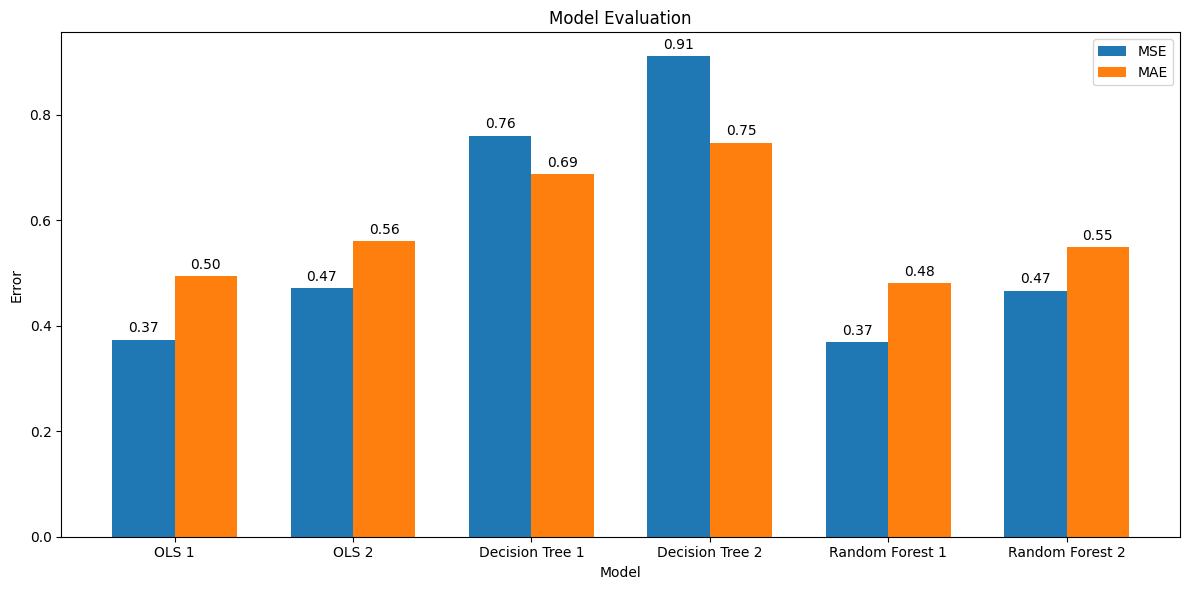

In [ ]:
import matplotlib.pyplot as plt

# Collecting results
labels = ['OLS 1', 'OLS 2', 'Decision Tree 1', 'Decision Tree 2', 'Random Forest 1', 'Random Forest 2']
mse_values = [ols_mse1, ols_mse2, dt_mse1, dt_mse2, rf_mse1, rf_mse2]
mae_values = [ols_mae1, ols_mae2, dt_mae1, dt_mae2, rf_mae1, rf_mae2]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - width/2, mse_values, width, label='MSE')
rects2 = ax.bar(x + width/2, mae_values, width, label='MAE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Model')
ax.set_ylabel('Error')
ax.set_title('Model Evaluation')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
